#Plotting Sigmoid Function

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.colors
import pandas as pd

$S_{w, b}(x) = \frac{1}{1 + e^{-(wx + b)}}$

In [0]:
def sigmoid(x, w, b):
  return 1/(1 + np.exp(-(w*x + b)))

In [0]:
sigmoid(1, 0.5, 0)

0.6224593312018546

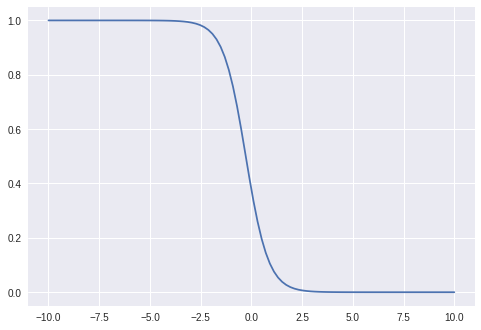

In [0]:
w = -1.8    #@param {type: "slider", min: -2, max: 2, step: 0.1}
b = -0.5  #@param {type: "slider", min: -2, max: 2, step: 0.1}
X = np.linspace(-10,10,100)
Y = sigmoid(X, w, b)

plt.plot(X, Y)
plt.show()


$S_{w_1, w_2, b}(x_1, x_2) = \frac{1}{1 + e^{-(w_1x_1 + w_2x_2 + b)}}$

In [0]:
def sigmoid_2d(x1, x2, w1, w2, b):
  return 1/(1 + np.exp(-(w1*x1 + w2*x2 + b)))

In [0]:
sigmoid_2d(1, 0, 0.5, 0, 0)

0.6224593312018546

In [0]:
X1 = np.linspace(-10, 10, 100)
X2 = np.linspace(-10, 10, 100)

XX1, XX2 = np.meshgrid(X1, X2)

print(X1.shape, X2.shape, XX1.shape, XX2.shape)

(100,) (100,) (100, 100) (100, 100)


In [0]:
w1 = 2
w2 = -0.5
b = 0
Y = sigmoid_2d(XX1, XX2, w1, w2, b)

In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

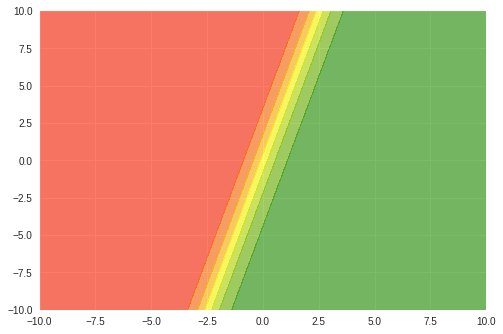

In [0]:
plt.contourf(XX1, XX2, Y, cmap = my_cmap, alpha = 0.6)
plt.show()

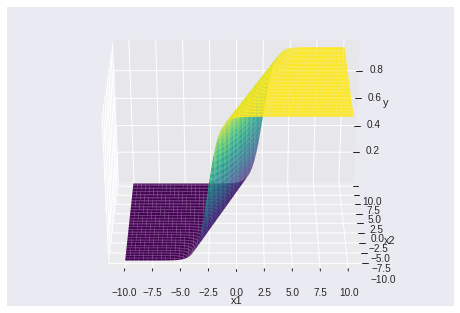

In [0]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

ax.view_init(30, 270)


# Compute Loss for a Given Dataset

In [0]:
w_unknown = 0.5
b_unknown = 0.25

X = np.random.random(25) * 20 - 10
Y = sigmoid(X, w_unknown, b_unknown)

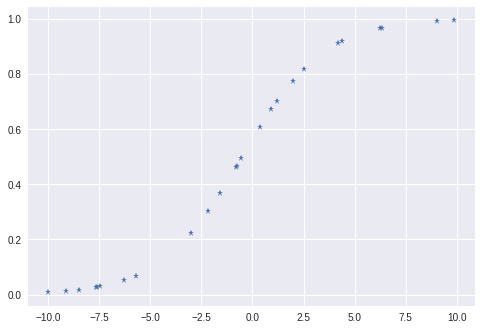

In [0]:
plt.plot(X, Y, '*')
plt.show()

In [0]:
def calculate_loss(X, Y, w_est, b_est):
  loss = 0
  for x, y in zip(X, Y):
    loss += (y - sigmoid(x, w_est, b_est))**2
  return loss

In [0]:
W = np.linspace(0, 2, 101)
B = np.linspace(-1, 1, 50)

WW, BB = np.meshgrid(W, B)

Loss = np.zeros(WW.shape)

In [11]:
B.shape

(50,)

In [13]:
WW.shape

(50, 101)

In [9]:
learning_rates = np.array([0.01,0.03,0.1,0.3,1,3])
iterations = np.arange(100,3000,200)
I,R = np.meshgrid(learning_rates,iterations)
I.shape, iterations.shape

((15, 6), (15,))

In [0]:
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i, j] = calculate_loss(X, Y, WW[i, j], BB[i, j])

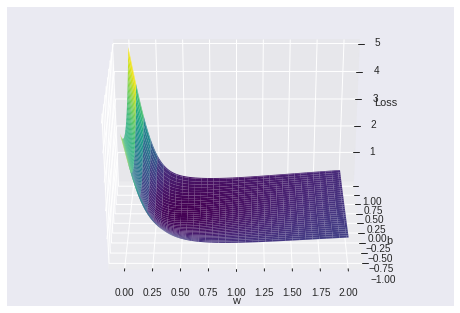

In [0]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss')

ax.view_init(30, 270)

In [0]:
ij = np.argmin(Loss)
i = int(np.floor(ij/Loss.shape[1]))
j = int(ij - i * Loss.shape[1])

In [0]:
print(i, j)

63 25


In [0]:
print(WW[i, j], BB[i, j])

0.5 0.26


# Class for Sigmoid Neuron

In [0]:
class SigmoidNeuron:
  
  def __init__(self):
    self.w = None
    self.b = None
    
  def sigmoid_perceptron(self, x):
    v = np.dot(x, self.w.T) + self.b
    return 1.0/(1.0 + np.exp(-v))
  
  def grad_w(self, x, y):
    y_pred = self.sigmoid_perceptron(x)
    return (y_pred - y) * y_pred * (1 - y_pred) * x
  
  def grad_b(self, x, y):
    y_pred = self.sigmoid_perceptron(x)
    return (y_pred - y) * y_pred * (1 - y_pred)
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True):
    
    # initialise w, b
    if initialise:
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0
    
    for i in range(epochs):
      dw = 0
      db = 0
      for x, y in zip(X, Y):
        dw += self.grad_w(x, y)
        db += self.grad_b(x, y)       
      self.w -= learning_rate * dw
      self.b -= learning_rate * db
      
      
sn = SigmoidNeuron()
r = sn.fit(X,Y,epochs=400,learning_rate=0.25)
sn.w

array([[ 2.69594773, -0.88219149]])

# Fit for toy data

In [0]:
X = np.asarray([[2.5, 2.5], [4, -1], [1, -4], [-3, 1.25], [-2, -4], [1, 5]])
Y = [1, 1, 1, 0, 0, 0]

In [0]:
sn = SigmoidNeuron()


[0.48083873]
[0.93401919]
[0.9394686]
[0.09407345]
[0.76323108]
[0.09544152]


[[ 2.67556194 -0.87399377]]


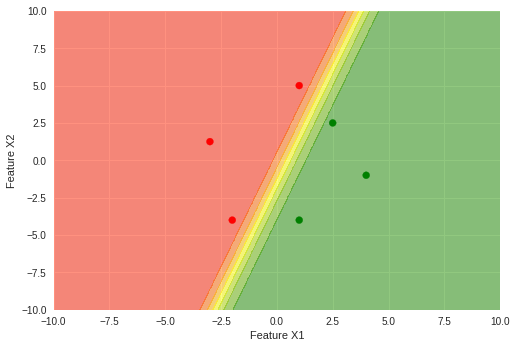

In [0]:

print(sn.w)
# contourplot to see the model
X1 = np.linspace(-10,10,100)
X2 = np.linspace(-10,10,100)
X1,X2 = np.meshgrid(X1,X2)

prediction = np.zeros(X1.shape)

for i in range(X1.shape[0]):
  for j in range(X1.shape[1]):
    data = [X1[i,j],X2[i,j]]
    prediction[i,j] = sn.sigmoid_perceptron(data)
    
    
plt.contourf(X1,X2,prediction,cmap=my_cmap,alpha=0.5)
plt.scatter(X[:,0],X[:,1],c=Y,cmap=my_cmap)
plt.xlabel('Feature X1')
plt.ylabel('Feature X2')
plt.show()